## Imports

In [1]:
#!pip install nltk

In [2]:
import numpy as np
import pandas as pd
import warnings

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA

## Configs

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 2000)


random_seed_nb = 99
pattern = r'[^\w\s]' #negacion de un caracter no presente en w (letras y numeros) ni s (espacios) 

## Functions

In [4]:
def stem_list(word_list):
    stem_result = [PorterStemmer().stem(word) for word in word_list]
    return stem_result


## Input data

In [5]:
edamam_flavor = pd.read_pickle('../data_discovery/edamam_flavor_dbs_nutrients.pkl')

In [6]:
similar_foods = pd.read_pickle('../data_discovery/similar_food_ingredients.pkl')
usda_foods = pd.read_csv('../data_discovery/all_branded_foods_usda.csv', index_col=0)
usda_foods = usda_foods[usda_foods.ingredients.notna()]

In [7]:
base_ingredients = pd.DataFrame()
base_ingredients['ingredients'] = pd.Series(similar_foods.index)
base_ingredients['ingredients_cleaned_list'] = base_ingredients.ingredients.str.lower().replace(pattern, '', regex=True).str.split(' ')
base_ingredients['stemmed_ingredients'] = base_ingredients.ingredients_cleaned_list.apply(stem_list)
base_ingredients['ingredients_cleaned'] = base_ingredients.stemmed_ingredients.str.join(' ')
base_ingredients['ingredients_for_search'] = ' ' + base_ingredients.ingredients_cleaned + ' '
base_ingredients.set_index('ingredients', inplace=True)

In [8]:
# Toma mucho tiempo
#usda_foods['ingredient_searchable'] = (
#    ' ' + 
#    usda_foods.ingredients\
#    .str.lower()\
#    .replace(pattern, '', regex=True)\
#    .str.split(' ')\
#    .apply(stem_list)\
#    .str.join(' ') +
#    ' ')

In [9]:
#usda_foods.to_csv('../data_discovery/all_branded_foods_usda_searchable.csv')
usda_foods = pd.read_csv('../data_discovery/all_branded_foods_usda_searchable.csv', index_col=0)

## data analysis

In [8]:
ingredients = base_ingredients.ingredients_for_search.to_dict()

In [9]:
base_ingredients.ingredients_for_search.to_pickle('../data_discovery/processed/available_ingredients.pkl')

In [10]:
#usda_ingredients_results = []
#i = 0
#for real_ingredient, search_ingredient in ingredients.items():
#    usda_ingredient_results = usda_foods[usda_foods.ingredient_searchable.str.contains(search_ingredient)]
#    usda_ingredient_results['ing'] = real_ingredient
#    usda_ingredients_results.append(usda_ingredient_results)
#    print(f'{i} {real_ingredient}', sep='; ')
#    i+=1

In [11]:
#usda_ingredients_repeated = pd.concat(usda_ingredients_results)

In [12]:
#usda_ingredients_repeated.ing.value_counts()

In [13]:
#usda_ingredients_repeated.ing.nunique()

In [14]:
#usda_ingredients = usda_ingredients_repeated.groupby('fdc_id').agg(
#    brand_owner = ('brand_owner', 'first'),
#    ingredients = ('ingredients', 'first'),
#    flavor_ingredients = ('ing', lambda x: list(x)),
#    category = ('branded_food_category', 'first'),
#    flavor_ingredients_count = ('ing', 'count'),
#)

In [17]:
#categs = usda_ingredients.category.value_counts()

In [15]:
categs_dict = {
    "Cheese":"cheese",
    "Cheese - Block": 'cheese',
    'Cheese/Cheese Substitutes': 'cheese',
    'Cheese - Speciality': 'cheese',
    "Breads & Buns": "bread",
    #'Dried Breads (Shelf Stable)': 'bread',
    "Bread": "bread",
    "Bread (Frozen)": "bread",
    'Bread (Shelf Stable)': 'bread',
    "Frozen Bread & Dough": "bread",
    "Yogurt":"yogurt",
    "Yogurt/Yogurt Substitutes":"yogurt",
    "Yogurt (Perishable)": "yogurt",
    'Yogurt/Yogurt Substitutes (Perishable)': 'yogurt',
    "Milk":"milk",
    "Plant Based Milk": "milk",
    'Milk/Milk Substitutes': 'milk',
    "Canned Vegetables":"vegetable",
    "Frozen Vegetables":"vegetable",
    'Vegetables  Unprepared/Unprocessed (Frozen)': 'vegetable',
    'Vegetables': 'vegetable',
    #"Pepperoni, Salami & Cold Cuts": "meat",
    "Sausages, Hotdogs & Brats": 'meat',
    #"Bacon, Sausages & Ribs": 'meat', 
    "Meat/Poultry/Other Animals  Unprepared/Unprocessed": "meat",
    "Canned Meat": "meat",
    "Other Meats":"meat",
    "Other Frozen Meats": 'meat',
    #"Poultry, Chicken & Turkey": "meat",
    #"Frozen Poultry, Chicken & Turkey": "meat",
    "Vegetarian Frozen Meats": "meat",
    "Meat/Poultry/Other Animals – Unprepared/Unprocessed": 'meat',
    'Chicken - Unprepared/Unprocessed':'meat',
    'Meat Substitutes': 'meat',
    'Frozen Meat': 'meat',
    'Salami / Cured Meat': 'meat',
    'Fresh Meat': 'meat',
    "Vegetable & Cooking Oils": 'oil',
    'Oils Edible': 'oil',
    'Oils Edible - Vegetable or Plant (Shelf Stable)': 'oil',
    'Fruit': 'fruit',
    'Canned Fruit': 'fruit',
    'Frozen Fruit': 'fruit',
    'Frozen Fruit & Fruit Juice Concentrates': 'fruit',
    'Fruits  Unprepared/Unprocessed (Frozen)': 'fruit',
    'Frozen Fish & Seafood':'seafood',
    'Frozen Fish/Seafood': 'seafood',
    'Fish  Unprepared/Unprocessed': 'seafood',
    "Fish – Unprepared/Unprocessed": 'seafood',
    'Canned Seafood':'seafood',
    'Shellfish Unprepared/Unprocessed': 'seafood',
    'Honey': 'honey',
    "Eggs & Egg Substitutes": 'egg',
    'Eggs/Eggs Substitutes': 'egg',
    'Eggs Products/Substitutes': 'egg',
    'Eggs': 'egg',
    #"Coffee": "coffee",
    #"Coffee/Tea/Substitutes": 'coffee',
    "Butter/Butter Substitutes": "butter",  
    'Butter & Spread': 'butter',
}

In [19]:
#del usda_ingredients['filtered_category']
#usda_ingredients['filtered_category'] = usda_ingredients.category.map(categs_dict)

In [16]:
#samples = []
#size = 200
#for categ in usda_ingredients[usda_ingredients.filtered_category.notnull()].filtered_category.unique():
#    print(categ)
#    for unique_categ in usda_ingredients[usda_ingredients.filtered_category==categ].category.unique():
#        try:
##            samples.append(usda_ingredients[(usda_ingredients.category==unique_categ) & (usda_ingredients.flavor_ingredients_count != 1)].sample(size, replace=True).reset_index().drop_duplicates('fdc_id').set_index('fdc_id'))
 #       except: 
 #           samples.append(usda_ingredients[(usda_ingredients.category==unique_categ)].sample(size, replace=True).reset_index().drop_duplicates('fdc_id').set_index('fdc_id'))

In [17]:
#sample_df = pd.concat(samples)
#sample_df['str_flavor_ingredients'] = sample_df.flavor_ingredients.apply(sorted).astype('str')
#sample_df.drop_duplicates(["category", "str_flavor_ingredients"], keep='first').shape[0]

In [18]:
#sample_df

In [19]:
columns_defined = [
    'taste',
    'functional_groups',
    'fooddb_flavor_profile',
    'supersweetdb_id',
    'fooddb_id',
    'common_name',
    'bitterdb_id',
    'super_sweet',
    'flavornet_id',
    'pubchem_id',
    'bitter',
    'iupac_name',
    'odor',
    'smile',
    'inchi',
    'cas_id',
    'flavor_profile',
    'fema_flavor_profile',
]

flavor_molecules_df_list = []

nutrition_facts_df_list = []

for row_index in range(edamam_flavor.shape[0]):
    df_temporal_index = edamam_flavor.iloc[row_index]
    flavor_molecules_df = pd.DataFrame(df_temporal_index.molecules)
    flavor_molecules_df['entity_alias_readable'] = df_temporal_index.entity_alias_readable
    flavor_molecules_df_list.append(flavor_molecules_df)
    nutrition_facts_df = pd.DataFrame(df_temporal_index.nutritional_info).iloc[-1:]
    nutrition_facts_df['entity_alias_readable'] = df_temporal_index.entity_alias_readable
    nutrition_facts_df_list.append(nutrition_facts_df)

In [22]:
nutrition_facts = pd.concat(nutrition_facts_df_list).set_index("entity_alias_readable").fillna(0)
flavor_molecules = pd.concat(flavor_molecules_df_list)[columns_defined + ['entity_alias_readable']]

entity_nutrition_facts = nutrition_facts.copy()

In [23]:
flavor_molecules['flavor_profile_list'] = flavor_molecules.fooddb_flavor_profile.str.split('@')
flavor_molecules['functional_group_list'] = flavor_molecules.functional_groups.str.split('@')

entity_flavor_profile = pd.DataFrame(flavor_molecules.explode('flavor_profile_list').groupby('entity_alias_readable').flavor_profile_list.apply(set).apply(list))
entity_functional_group = pd.DataFrame(flavor_molecules.explode('functional_group_list').groupby('entity_alias_readable').functional_group_list.apply(set).apply(list))
entity_flavor_molecules_name = pd.DataFrame(flavor_molecules.groupby('entity_alias_readable').common_name.apply(set).apply(list))

In [24]:
def get_entity_simplification_for_feature(entity_feature_df, feature, fill_value=np.nan):
    relation_df = entity_feature_df.explode(feature)
    relation_df['dummy'] = 1
    entity_feature = pd.pivot_table(
        relation_df, 
        index = 'entity_alias_readable',
        columns = feature, 
        aggfunc = 'count', 
        values = "dummy", 
        fill_value=fill_value
    )
    return entity_feature

def get_dim_reduction_from_simplification(simplified_df, feature_name, components=100):
    pca_obj = PCA(
        n_components=components,
        copy=True, 
        whiten=False,
        svd_solver='auto',
        tol=0.0, 
        iterated_power='auto',
        n_oversamples=10,
        power_iteration_normalizer='auto', 
        random_state=random_seed_nb
    )
    columns = [f'{feature_name}__{col}' for col in range(components)]
    dim_reduction = pd.DataFrame(pca_obj.fit_transform(simplified_df), index=simplified_df.index, columns=columns)
    return dim_reduction, pca_obj

In [27]:
get_entity_simplification_for_feature(entity_flavor_molecules_name, "common_name")

common_name,(+)-3-Carene,(+)-Camphene,(+)-Dihydrocarveol,(+)-Isomenthone,(+)-Linalool,(+)-Neomenthol,(+)-Pulegone,(+)-alpha-Terpineol,(+)-alpha-phellandrene,(+)-delta-Cadinene,...,trans-3-Hexen-1-ol,trans-3-Hexenoic acid,trans-Aconitic acid,trans-Anethole,triacetin,tridec-2-enal,trimethylamine,tyramine,valofin,vanillin
entity_alias_readable,,,,,,,,,,,,,,,,,,,,,
Abalone,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Abiyuch,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Acerola,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Acorn,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Adzuki bean,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Agar,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Agave,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Alaska blackfish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska pollock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
entity_flavor_profile_reduced, entity_flavor_profile_transformer = get_dim_reduction_from_simplification(
    get_entity_simplification_for_feature(entity_flavor_profile, "flavor_profile_list", fill_value=0),
    feature_name='flavor_profile',
    components=50
)

entity_functional_group_reduced, entity_functional_transformer = get_dim_reduction_from_simplification(
    get_entity_simplification_for_feature(entity_functional_group, "functional_group_list", fill_value=0),
    feature_name='functional_group',
    components=20
)

entity_flavor_molecules_name_reduced, entity_flavor_molecules_name_transformer = get_dim_reduction_from_simplification(
    get_entity_simplification_for_feature(entity_flavor_molecules_name, "common_name", fill_value=0),
    feature_name='common_name',
    components=100
)

In [27]:
#get_entity_simplification_for_feature(entity_flavor_molecules_name, "common_name", fill_value=0)

In [28]:
def get_features_vector(ingredient_list):
    return pd.concat([
        entity_flavor_molecules_name_reduced.loc[ingredient_list].mean(), 
        entity_flavor_profile_reduced.loc[ingredient_list].mean(), 
        entity_functional_group_reduced.loc[ingredient_list].mean(),
        entity_nutrition_facts.loc[ingredient_list].mean()
    ])

In [29]:
entity_flavor_molecules_name_reduced.to_pickle('../data_discovery/processed/entity_flavor_molecules_name_reduced.pkl')
entity_flavor_profile_reduced.to_pickle('../data_discovery/processed/entity_flavor_profile_reduced.pkl')
entity_functional_group_reduced.to_pickle('../data_discovery/processed/entity_functional_group_reduced.pkl')
entity_nutrition_facts.to_pickle('../data_discovery/processed/entity_nutrition_facts.pkl')

In [31]:
features = sample_df.flavor_ingredients.apply(get_features_vector)

In [32]:
y = sample_df.filtered_category

In [33]:
import matplotlib.pyplot as plt
import os
import pickle
import shap
import seaborn as sns
import warnings
import shap

from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [34]:
train_x, test_x, train_y, test_y = train_test_split(
    features, y, 
    train_size=0.7, 
    random_state=random_seed_nb
)

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(train_x, train_y)

RandomForestClassifier()

In [37]:
pred = model.predict(test_x)#[:, 1]

In [38]:
test_values = pd.DataFrame()
test_values['y'] = test_y 
test_values['pred'] = pred
test_values.loc[test_values.y == test_values.pred, 'correct_prediction'] = 1
test_values.loc[test_values.y != test_values.pred, 'correct_prediction'] = 0

In [39]:
print(classification_report(test_values['y'], test_values['pred']))

              precision    recall  f1-score   support

       bread       0.90      0.97      0.93       206
      butter       0.95      0.85      0.90        86
      cheese       0.91      0.91      0.91       101
         egg       1.00      0.97      0.98        63
       fruit       0.99      0.95      0.97       108
       honey       0.94      0.98      0.96        49
        meat       0.93      0.92      0.92       423
        milk       0.85      0.81      0.83       129
         oil       0.96      0.97      0.96        88
     seafood       0.87      0.91      0.89       232
   vegetable       0.85      0.83      0.84       119
      yogurt       0.93      0.91      0.92       152

    accuracy                           0.91      1756
   macro avg       0.92      0.92      0.92      1756
weighted avg       0.91      0.91      0.91      1756



In [41]:
y.shape[0]**2

34234201

In [116]:
print(classification_report(test_values['y'], test_values['pred']))

              precision    recall  f1-score   support

       bread       0.81      0.92      0.86        52
      butter       0.85      0.82      0.84        28
      cheese       0.94      0.91      0.93        34
         egg       1.00      1.00      1.00        21
       fruit       0.86      0.94      0.90        33
       honey       0.92      0.92      0.92        13
        meat       0.89      0.87      0.88       116
        milk       0.88      0.76      0.82        38
         oil       0.96      0.83      0.89        29
     seafood       0.83      0.89      0.86        79
   vegetable       0.93      0.78      0.85        32
      yogurt       0.85      0.91      0.88        44

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.88      0.88      0.88       519



In [42]:
t = y.reset_index()

t['fdc_id2'] = [y.reset_index().fdc_id.to_list()] * y.reset_index().shape[0]

similarity = t.drop("fdc_id2", axis=1).merge(t.explode("fdc_id2"), left_on='fdc_id', right_on='fdc_id2', how='inner')

similarity['similar'] = (similarity.filtered_category_x == similarity.filtered_category_y).astype('int')

similarity = similarity.rename(columns={'fdc_id_x': 'fdc_id_source', 'fdc_id_y':'fdc_id_target'})[['fdc_id_source', 'fdc_id_target', 'similar']]

In [43]:
similarity_sample = similarity.sample(frac=0.1, random_state=random_seed_nb)

In [44]:
similarity_dataset = similarity_sample.merge(
    features.reset_index(), left_on='fdc_id_source', right_on='fdc_id'
).drop('fdc_id', axis=1).merge(features.reset_index(), left_on='fdc_id_target', right_on='fdc_id').drop('fdc_id', axis=1)

In [45]:
non_predictor_columns = ['similar']
id_columns = ['fdc_id_source', 'fdc_id_target']
predictors = similarity_dataset.drop(non_predictor_columns, axis=1)
target = similarity_dataset.similar # Utilizamos la columna 'similar' como variable de respuesta

In [46]:
train_index, test_index = train_test_split(
    predictors['fdc_id_source'].unique(), 
    train_size=0.7, 
    random_state=random_seed_nb
)

# Queremos que lo que vea el modelo para entrenar NO esté de 
# ninguna manera en el conjunto de pruebas.
real_train_index = predictors[
    (predictors['fdc_id_source'].isin(train_index)) & 
    (~predictors['fdc_id_target'].isin(test_index))
].index

# Queremos también que lo que vea el modelo para evaluar NO esté 
# de ninguna manera incluido en el conjunto de entrenamiento.
real_test_index = predictors[
    (predictors['fdc_id_source'].isin(test_index)) &
    (~predictors['fdc_id_target'].isin(train_index))
].index

In [47]:
x_train = predictors.loc[real_train_index].drop(id_columns, axis=1)#.fillna(-100)
y_train = target.loc[real_train_index]

x_test = predictors.loc[real_test_index].drop(id_columns, axis=1)#.fillna(-100)
y_test = target.loc[real_test_index]

In [48]:
# Salvemos los conjuntos de datos para predecir y para evaluar

# train
x_train.to_parquet("../data_discovery/processed/x_train.parquet")
pd.DataFrame(y_train).to_parquet("../data_discovery/processed/y_train.parquet")

# test
x_test.to_parquet("../data_discovery/processed/x_test.parquet")
pd.DataFrame(y_test).to_parquet("../data_discovery/processed/y_test.parquet")

In [ ]:
model_sim = RandomForestClassifier()
model_sim.fit(x_train, y_train)

In [56]:
pred = model_sim.predict_proba(x_test)[:, 1]
results = pd.DataFrame()
results['pred'] = pred
results.set_index(x_test.index, inplace=True)
results['similar'] = y_test
roc_auc_score(y_test, pred)

0.9611254754543189

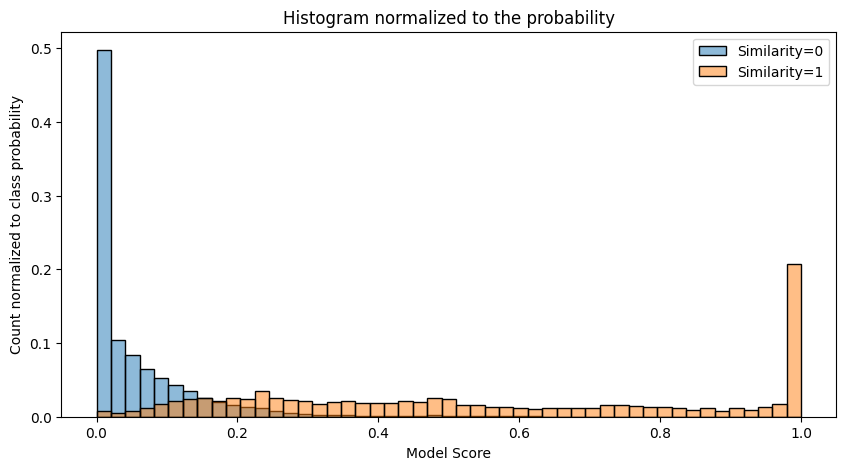

In [57]:
steps = 25
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(pred[y_test==0], bins=np.linspace(0,1,50), stat="probability", alpha=0.5, label='Similarity=0')
sns.histplot(pred[y_test==1], bins=np.linspace(0,1,50), stat="probability", alpha=0.5, label='Similarity=1')
plt.legend()
plt.title("Histogram normalized to the probability")
plt.xlabel("Model Score")
plt.ylabel("Count normalized to class probability")
plt.show()

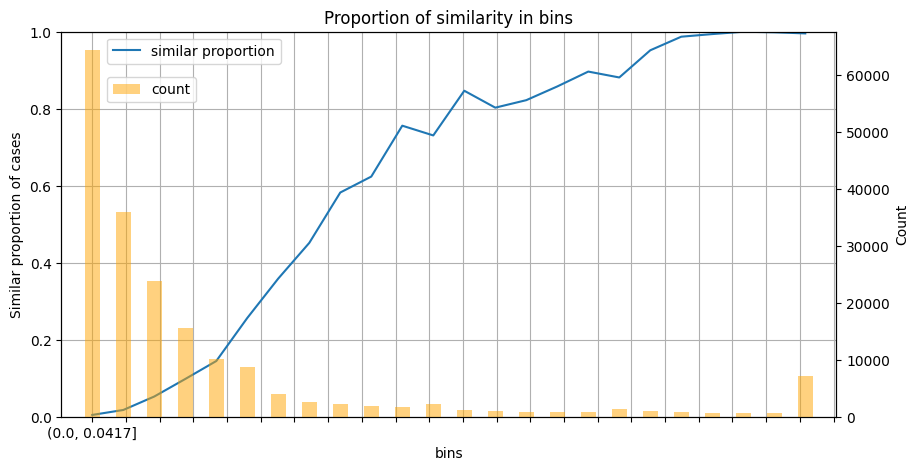

In [58]:
results['bins'] = pd.cut(results.pred, bins=np.linspace(0,1,steps))
fig, ax = plt.subplots(figsize=(10,5))
results.groupby("bins").similar.mean().plot(ax=ax, label='similar proportion')
ax.set_title("Proportion of similarity in bins")
ax.set_ylim(0,1)
ax.grid()
ax2 = plt.twinx(ax)
results.groupby('bins').similar.count().plot(ax=ax2, kind='bar', color='orange', alpha=0.5, label='count')
ax.set_xticks(np.linspace(0,steps,steps-1))
ax2.set_xlim(-1,steps-1)
ax2.set_ylabel('Count')
ax.set_ylabel('Similar proportion of cases')
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.9))

plt.show()

In [59]:
model_path = "../models/first_model.pkl"

with open(model_path, "wb") as file:
    pickle.dump(model_sim, file)

In [74]:
x_test

,common_name__0_x,common_name__1_x,common_name__2_x,common_name__3_x,common_name__4_x,common_name__5_x,common_name__6_x,common_name__7_x,common_name__8_x,common_name__9_x,...,VITB6A_y,FOLDFE_y,FOLFD_y,FOLAC_y,VITB12_y,VITD_y,TOCPHA_y,VITK1_y,WATER_y,SUGAR.added_y
3458,-0.128459,1.157585,0.422561,-0.311993,-0.488577,0.482472,0.153557,-0.063447,-0.376724,-0.124226,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
3459,-1.507485,1.212019,0.350180,-0.735208,-0.413361,0.701485,-0.011534,0.182457,-0.276479,0.096015,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
3462,0.588449,1.247960,1.567307,0.062610,-0.301401,0.637654,-0.057798,0.223367,-0.650286,0.128409,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
3465,-1.837593,1.083706,-0.099930,-0.335847,-0.416345,-0.127810,-0.565127,0.161911,-0.354812,-0.144060,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
3468,-1.163320,0.411096,0.715846,-0.073080,-0.408240,0.279590,-0.011227,-0.424287,-0.427104,-0.031959,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985960,-3.582212,1.411666,-0.180557,-0.486203,-2.197139,-0.706807,0.899622,-0.424371,-0.846836,-0.252496,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
2985968,-1.431930,1.077150,0.867220,-0.023574,-0.894709,-0.442870,0.206659,-0.205994,-0.415216,-0.139328,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
2985971,-4.322850,-0.266186,0.048735,-0.265039,-0.791466,0.110509,0.489936,-0.022389,-0.577295,-0.345464,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
2985976,-4.322850,-0.266186,0.048735,-0.265039,-0.791466,0.110509,0.489936,-0.022389,-0.577295,-0.345464,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000


In [75]:
x_train

,common_name__0_x,common_name__1_x,common_name__2_x,common_name__3_x,common_name__4_x,common_name__5_x,common_name__6_x,common_name__7_x,common_name__8_x,common_name__9_x,...,VITB6A_y,FOLDFE_y,FOLFD_y,FOLAC_y,VITB12_y,VITD_y,TOCPHA_y,VITK1_y,WATER_y,SUGAR.added_y
0,-0.128459,1.157585,0.422561,-0.311993,-0.488577,0.482472,0.153557,-0.063447,-0.376724,-0.124226,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.100000,50.388571,14.257143
1,0.588449,1.247960,1.567307,0.062610,-0.301401,0.637654,-0.057798,0.223367,-0.650286,0.128409,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.100000,50.388571,14.257143
4,-1.507485,1.212019,0.350180,-0.735208,-0.413361,0.701485,-0.011534,0.182457,-0.276479,0.096015,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.100000,50.388571,14.257143
5,-0.150871,1.582060,0.500366,-0.968459,-0.411059,1.084310,-0.275319,0.059674,-0.117170,0.301837,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.100000,50.388571,14.257143
7,-1.108706,0.404106,0.246180,-0.419336,-0.577701,0.330238,0.426420,-0.080629,-0.234213,0.068085,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.100000,50.388571,14.257143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984250,-2.587941,1.172076,0.079230,-0.674900,-1.165370,-0.373850,0.172920,-0.391688,-0.604089,-0.251122,...,0.096000,53.857143,53.857143,0.0,0.245714,0.642857,1.581429,54.285714,49.000000,0.000000
2984251,-4.322850,-0.266186,0.048735,-0.265039,-0.791466,0.110509,0.489936,-0.022389,-0.577295,-0.345464,...,0.096000,53.857143,53.857143,0.0,0.245714,0.642857,1.581429,54.285714,49.000000,0.000000
2984252,-2.892358,1.833914,-0.302991,-0.059751,-1.039552,-0.073993,0.165812,-0.232161,-0.636394,-0.281934,...,0.096000,53.857143,53.857143,0.0,0.245714,0.642857,1.581429,54.285714,49.000000,0.000000
2984253,-1.463544,1.295668,0.325292,-0.710846,-1.203042,-0.390078,0.364078,-0.531207,-0.327437,-0.013142,...,0.096000,53.857143,53.857143,0.0,0.245714,0.642857,1.581429,54.285714,49.000000,0.000000


In [76]:
similarity_dataset

,fdc_id_source,fdc_id_target,similar,common_name__0_x,common_name__1_x,common_name__2_x,common_name__3_x,common_name__4_x,common_name__5_x,common_name__6_x,...,VITB6A_y,FOLDFE_y,FOLFD_y,FOLAC_y,VITB12_y,VITD_y,TOCPHA_y,VITK1_y,WATER_y,SUGAR.added_y
0,761256,761256,1,-0.128459,1.157585,0.422561,-0.311993,-0.488577,0.482472,0.153557,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
1,760578,761256,1,0.588449,1.247960,1.567307,0.062610,-0.301401,0.637654,-0.057798,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
2,350364,761256,1,-0.128459,1.157585,0.422561,-0.311993,-0.488577,0.482472,0.153557,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
3,350360,761256,1,-1.507485,1.212019,0.350180,-0.735208,-0.413361,0.701485,-0.011534,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
4,761248,761256,1,-1.507485,1.212019,0.350180,-0.735208,-0.413361,0.701485,-0.011534,...,0.091714,17.714286,17.714286,0.0,0.117143,0.200000,0.675714,2.1,50.388571,14.257143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985979,2525912,2457076,1,-4.322850,-0.266186,0.048735,-0.265039,-0.791466,0.110509,0.489936,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
2985980,2540580,2457076,1,-2.892358,1.833914,-0.302991,-0.059751,-1.039552,-0.073993,0.165812,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
2985981,2525914,2457076,1,-1.463544,1.295668,0.325292,-0.710846,-1.203042,-0.390078,0.364078,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
2985982,2525927,2457076,1,-1.431930,1.077150,0.867220,-0.023574,-0.894709,-0.442870,0.206659,...,0.056667,15.666667,15.666667,0.0,0.296667,0.666667,0.350000,0.1,58.766667,0.000000
